# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

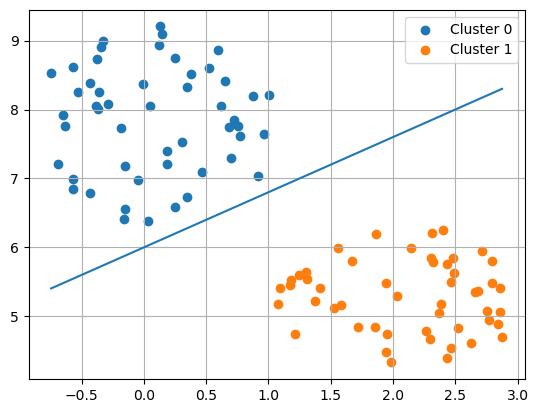

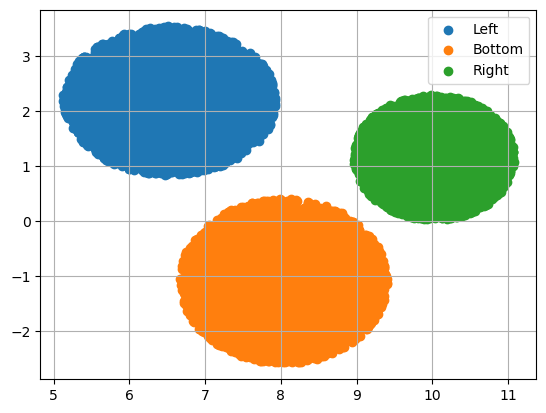

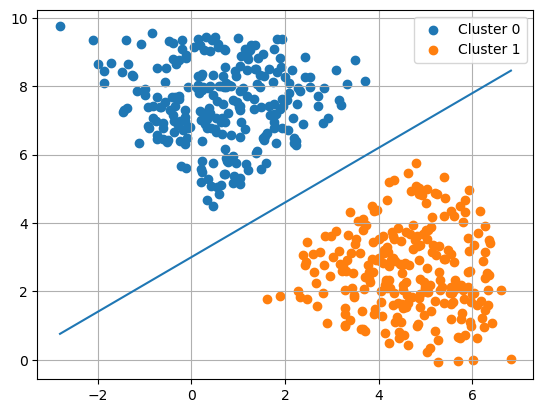

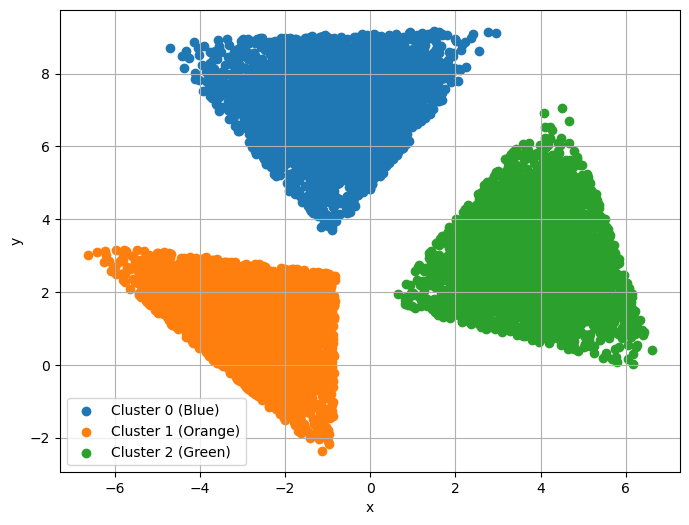

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# загрузка Excel
df = pd.read_excel("0.xls")
df = df.iloc[:, :2]
df.columns = ['x', 'y']

df['cluster'] = np.where(df['y'] > 0.8 * df['x'] + 6, 0, 1)

x_line = np.linspace(df.x.min(), df.x.max(), 100)
y_line = 0.8 * x_line + 6

plt.scatter(df[df.cluster == 0]['x'], df[df.cluster == 0]['y'], label='Cluster 0')
plt.scatter(df[df.cluster == 1]['x'], df[df.cluster == 1]['y'], label='Cluster 1')
plt.plot(x_line, y_line)

plt.grid(True)
plt.legend()
plt.show()

# загрузка Excel
df = pd.read_excel("1.xls")
df = df.iloc[:, :2]
df.columns = ['x', 'y']

def three_circles(row):
    x, y = row['x'], row['y']

    if 4.5 <= x <= 8.2 and 0.5 <= y <= 4:
        return 0  # левый
    if 8.95 <= x <= 11.3 and 0 <= y <= 2.4:
        return 2  # правый
    if 6 <= x <= 12 and -2.6 <= y <= 1.5:
        return 1  # нижний

    print(x, y)
    assert 0

    
df['cluster'] = df.apply(three_circles, axis=1)

plt.scatter(df[df.cluster == 0]['x'], df[df.cluster == 0]['y'], label='Left')
plt.scatter(df[df.cluster == 1]['x'], df[df.cluster == 1]['y'], label='Bottom')
plt.scatter(df[df.cluster == 2]['x'], df[df.cluster == 2]['y'], label='Right')

plt.legend()
plt.grid(True)
plt.show()


# загрузка Excel
df = pd.read_excel("4.xlsx")
df = df.iloc[:, :2]
df.columns = ['x', 'y']

df['cluster'] = np.where(df['y'] > 0.8 * df['x'] + 3, 0, 1)

x_line = np.linspace(df.x.min(), df.x.max(), 100)
y_line = 0.8 * x_line + 3

plt.scatter(df[df.cluster == 0]['x'], df[df.cluster == 0]['y'], label='Cluster 0')
plt.scatter(df[df.cluster == 1]['x'], df[df.cluster == 1]['y'], label='Cluster 1')
plt.plot(x_line, y_line)

plt.grid(True)
plt.legend()
plt.show()

# загрузка Excel
df = pd.read_excel("5.xlsx")
df = df.iloc[:, :2]
df.columns = ['x', 'y']


# классификация треугольников
def triangle_clusters(row):
    x, y = row['x'], row['y']

    # правый нижний
    if (x > 0.6) and (y < x + 3.4):
        return 2

    # левый нижний
    if (y < 3.7):
        return 1

    # иначе
    return 0


df['cluster'] = df.apply(triangle_clusters, axis=1)


# --- Визуализация ---
plt.figure(figsize=(8, 6))

plt.scatter(
    df[df.cluster == 0]['x'],
    df[df.cluster == 0]['y'],
    label='Cluster 0 (Blue)'
)

plt.scatter(
    df[df.cluster == 1]['x'],
    df[df.cluster == 1]['y'],
    label='Cluster 1 (Orange)'
)
plt.scatter(
    df[df.cluster == 2]['x'],
    df[df.cluster == 2]['y'],
    label='Cluster 2 (Green)'
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [24]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

warnings.filterwarnings("ignore")

In [25]:

two_means = cluster.MiniBatchKMeans(
    n_clusters=3,
    random_state=0,
)

dbscan = cluster.DBSCAN(
    eps=0.3,
    min_samples=20,
)

clustering_algorithms = (
    ("MiniBatch\nKMeans", two_means),
    ("DBSCAN", dbscan),
)

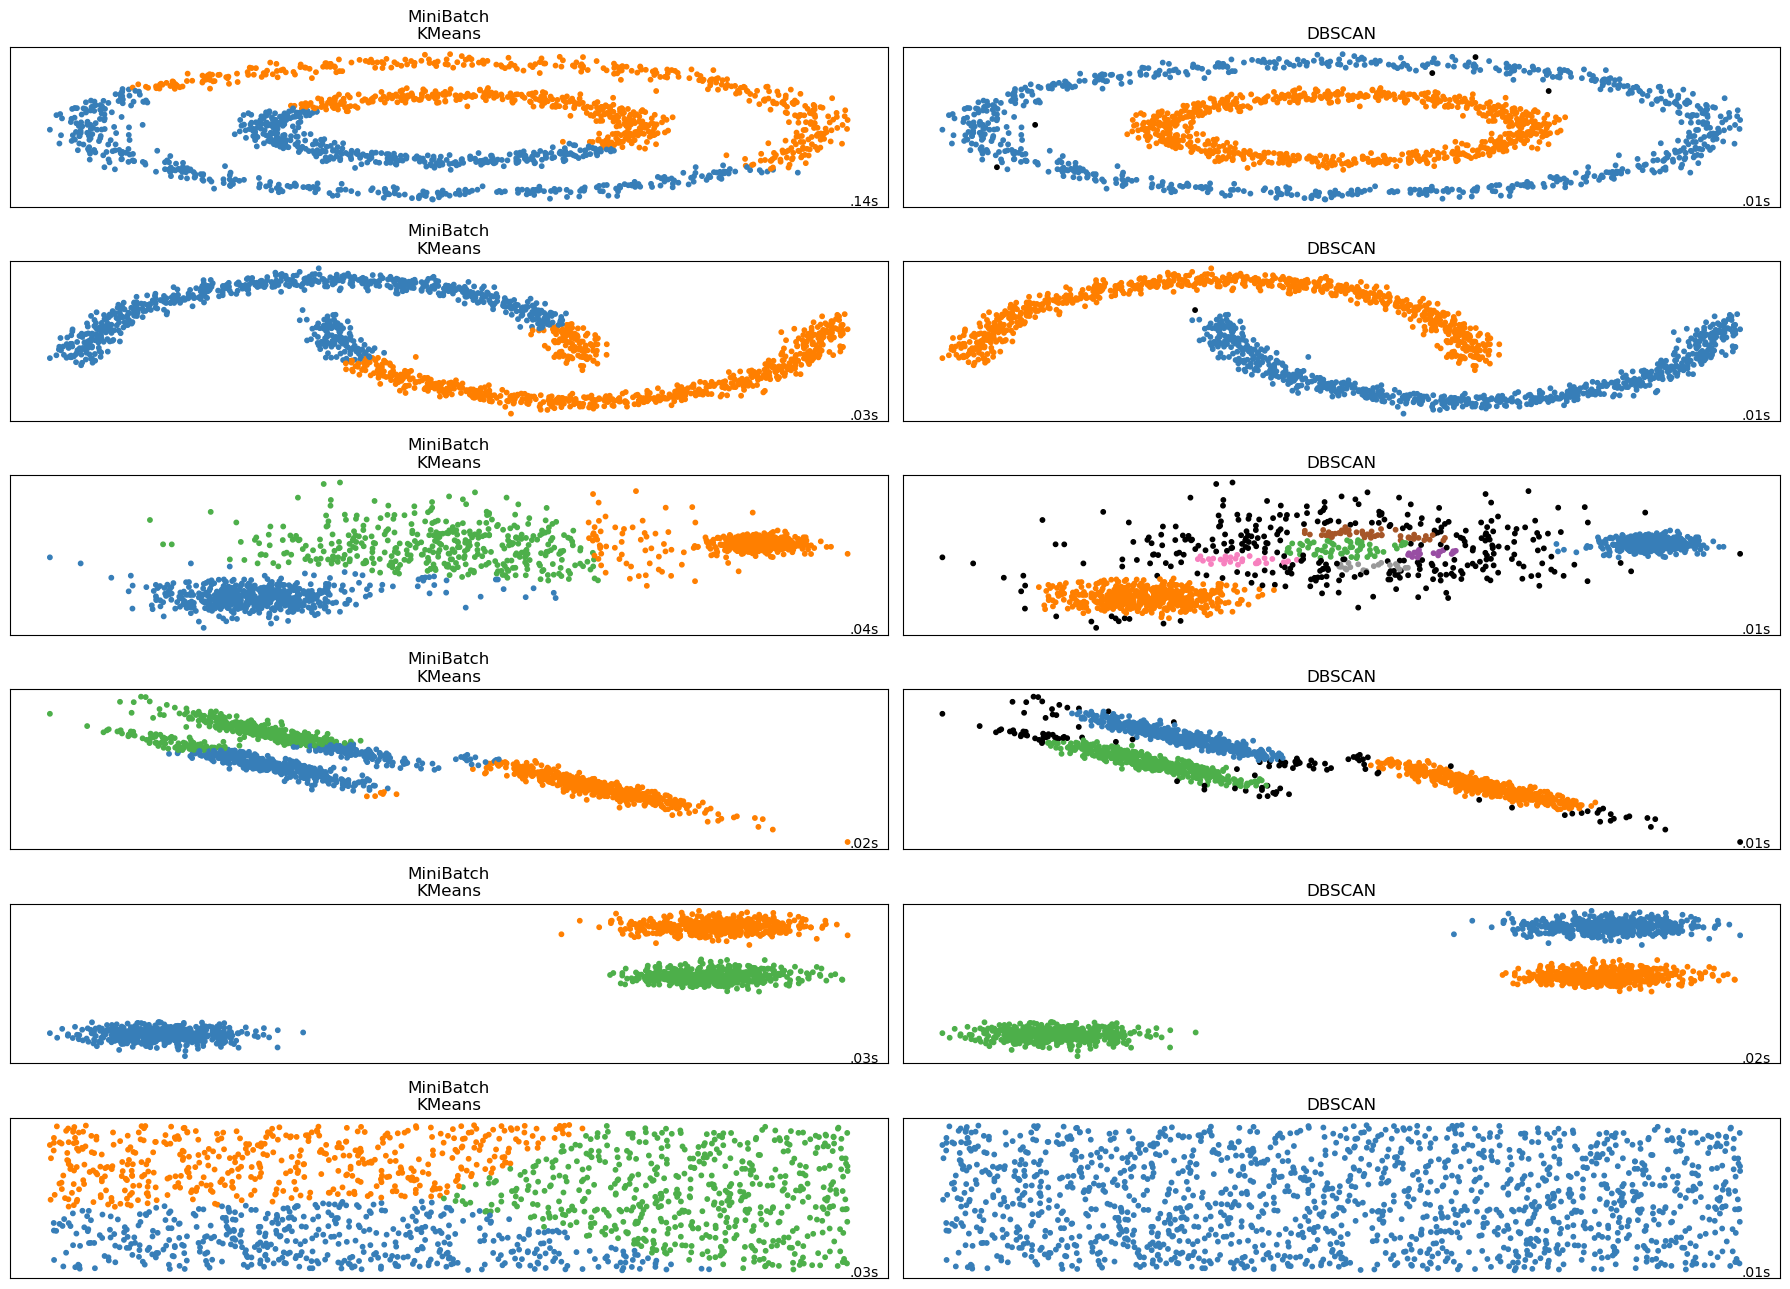

In [26]:

np.random.seed(0)
n_samples = 1500

noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05
)

noisy_moons = datasets.make_moons(
    n_samples=n_samples, noise=0.05
)

blobs = datasets.make_blobs(
    n_samples=n_samples, random_state=8
)

no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(
    n_samples=n_samples,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=random_state,
)

datasets_list = [
    (noisy_circles, {"n_clusters": 2, "eps": 0.2}),
    (noisy_moons, {"n_clusters": 2, "eps": 0.2}),
    (varied, {"n_clusters": 3, "eps": 0.18}),
    (aniso, {"n_clusters": 3, "eps": 0.15}),
    (blobs, {"n_clusters": 3, "eps": 0.3}),
    (no_structure, {"n_clusters": 3, "eps": 0.3}),
]


plt.figure(figsize=(18, 13))
plot_num = 1

for i_dataset, (dataset, params) in enumerate(datasets_list):

    X, y = dataset
    X = StandardScaler().fit_transform(X)

    for name, algorithm in clustering_algorithms:

        # обновляем параметры
        if name.startswith("MiniBatch"):
            algorithm.set_params(n_clusters=params["n_clusters"])
        if name == "DBSCAN":
            algorithm.set_params(eps=params["eps"])

        t0 = time.time()
        algorithm.fit(X)

        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_
        else:
            y_pred = algorithm.predict(X)

        t1 = time.time()

        plt.subplot(len(datasets_list), len(clustering_algorithms), plot_num)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )

        if -1 in y_pred:
            colors = np.append(colors, ["#000000"], axis=0)

        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xticks(())
        plt.yticks(())

        plt.title(name, size=12)
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=10,
            horizontalalignment="right",
        )

        plot_num += 1

plt.tight_layout()
plt.show()